<a href="https://colab.research.google.com/github/ddivebkhan/Quantitative-Trading/blob/main/Quantitative_Trading_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas yfinance matplotlib numpy scipy

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Fetching Financial Data

This code fetches Apple’s historical stock data from Yahoo Finance, covering the period from January 1, 2020, to February 1, 2025. The data includes columns such as Open, High, Low, Close, Price and Volume.

In [3]:
# Download historical data for Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2025-02-26')

# Display the first few rows of the dataset
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200


In [4]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-19,244.869995,246.009995,243.160004,244.660004,32204200
2025-02-20,245.830002,246.779999,244.289993,244.940002,32316900
2025-02-21,245.550003,248.690002,245.220001,245.949997,53197400
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300


# Calculating Moving Averages

We calculate the 20-day and 50-day moving averages of Apple's stock closing prices. Moving averages are used to smooth out price fluctuations and identify trends.

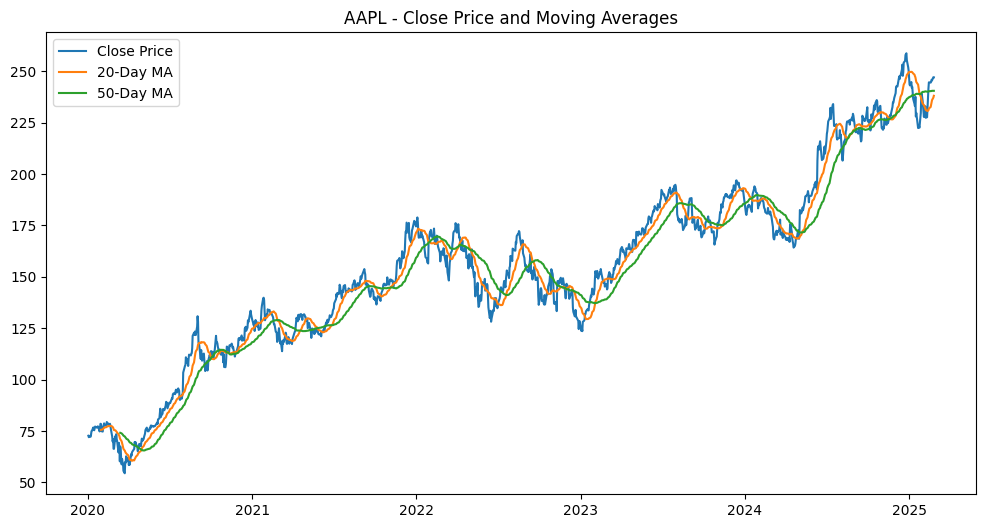

In [5]:
# Calculate the 20-day and 50-day moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot the closing price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA20'], label='20-Day MA')
plt.plot(data['MA50'], label='50-Day MA')
plt.title(f'{ticker} - Close Price and Moving Averages')
plt.legend()
plt.show()

The chart tracks three key metrics:

**Blue line:** Daily closing price of Apple stock

**Orange line:** 20-Day Moving Average (shorter-term trend)

**Green line:** 50-Day Moving Average (longer-term trend)

**Key trends and patterns:**

**Overall growth:** Apple stock has grown significantly, starting around 75usd in early 2020 and reaching peaks above 250usd by 2025.

**Major price movements:**

- Early 2020: Sharp decline (likely during the COVID-19 market crash)
- 2020-2021: Strong recovery and steady growth period
- 2022: Period of price consolidation/sideways movement around 150-175
- 2023: Renewed growth reaching approximately 190
- 2024-2025: Accelerated growth to all-time highs above 250, followed by recent volatility


Moving average relationships:

- When the blue line (price) crosses above the orange and green lines, it indicates bullish momentum

- When the blue line falls below these averages, it suggests bearish momentum

- The 20-Day MA (orange) responds faster to price changes than the 50-Day MA (green)

- When the orange line crosses above the green line, it forms a "golden cross" (bullish signal)

- When the orange line crosses below the green line, it forms a "death cross" (bearish signal)

# Analyzing Momentum with RSI

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements.

What is the Relative Strength Index (RSI)?

**The Relative Strength Index (RSI)** is a momentum oscillator used in technical analysis to measure the speed and change of price movements. It oscillates between 0 and 100, providing a visual representation of whether a stock or other asset is overbought or oversold.

**Momentum Oscillator:** This means it tracks the rate of price change, not just the price itself. It's used to gauge the strength of a trend.

**Bounded Range:** Unlike some indicators that can theoretically go to infinity, the RSI's 0-100 range makes it easy to interpret.

**Key Insight:** The RSI is primarily used to identify potential turning points in price trends by flagging overbought and oversold conditions.




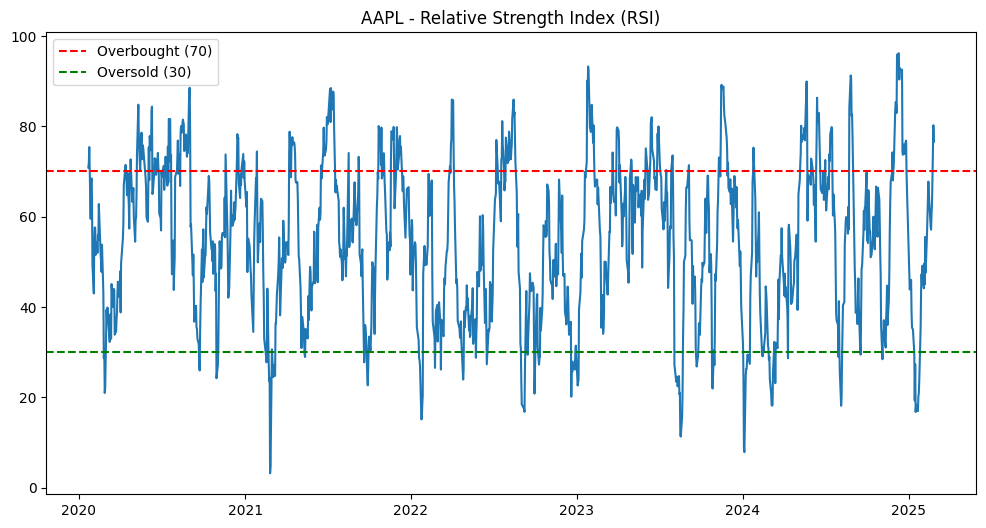

In [6]:
# Calculate the RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Add RSI to the DataFrame
data['RSI'] = rsi

# Plot the RSI
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'])
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title(f'{ticker} - Relative Strength Index (RSI)')
plt.legend()
plt.show()


The chart shows Apple's RSI has been quite volatile, frequently moving between overbought and oversold territories. There have been multiple instances where:

The RSI spiked above 90 (particularly in late 2024/early 2025)
The RSI dropped below 10 (notably in 2021 and periods of 2024)

When RSI rises above 70 (Overbought)
When Apple's RSI exceeds 70, technical analysts consider the stock "overbought." This suggests:

The stock has experienced rapid or substantial price gains in a short period
Buying momentum may be unsustainable at current levels
The price may have temporarily moved ahead of its intrinsic value
A price correction or consolidation period could be imminent

Looking at the chart, Apple's RSI frequently exceeded 70 between 2020-2025, sometimes reaching extreme levels above 90. These periods often represent times when investor enthusiasm pushed the price up quickly, potentially creating a situation where profit-taking or selling pressure could emerge. Traders might consider reducing positions or implementing protective strategies when seeing these signals.

**When RSI falls below 30 (Oversold)**:

When Apple's RSI drops below 30, it indicates an "oversold" condition, suggesting:

- The stock has seen significant selling pressure or price declines

- Selling momentum may be exhausting itself
- The price may have temporarily fallen below its intrinsic value
- A bounce or recovery could be forthcoming

The chart shows multiple instances where Apple's RSI fell below 30, sometimes dropping to extreme levels near 0-10. These represent periods when pessimism or selling pressure was intense, potentially creating opportunities for contrarian investors to consider entering positions. These oversold readings often occurred during broader market corrections or Apple-specific negative news.
It's important to note that while these thresholds provide useful signals, they aren't absolute buy/sell indicators on their own. Overbought conditions can persist during strong uptrends (as seen in late 2024), and oversold conditions can continue during strong downtrends. Many traders use RSI in conjunction with other technical indicators, price patterns, and fundamental analysis for more reliable trading decisions.

# Trading Strategy

This simple strategy generates buy signals when the 20-day moving average crosses above the 50-day moving average, and the RSI is below 30. Conversely, it generates sell signals when the 20-day MA crosses below the 50-day MA, and the RSI is above 70. The buy and sell signals are plotted on the price chart.

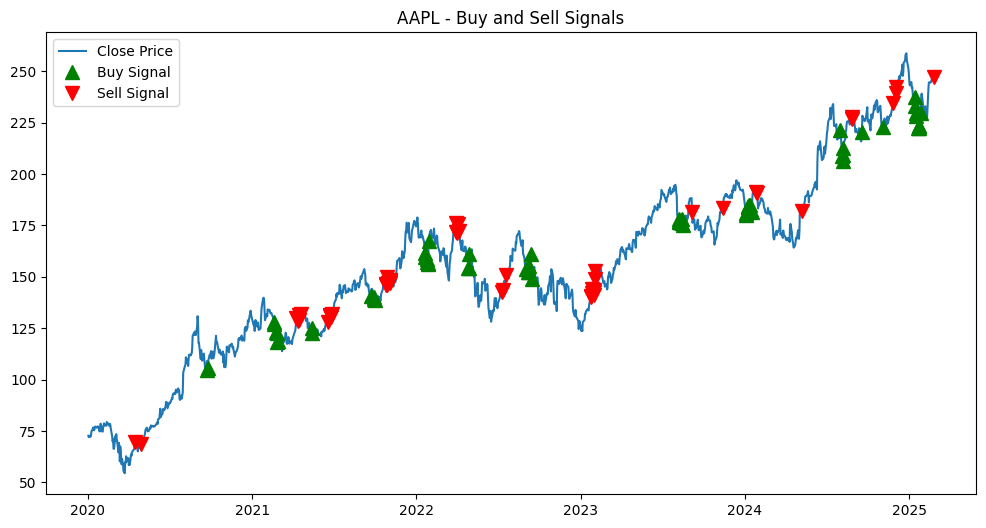

In [7]:
# Define the trading strategy
def trading_strategy(data):
    data['Signal'] = 0

    # Buy Signal: When 20-day MA crosses above 50-day MA and RSI < 30
    data.loc[(data['MA20'] > data['MA50']) & (data['RSI'] < 30), 'Signal'] = 1

    # Sell Signal: When 20-day MA crosses below 50-day MA and RSI > 70
    data.loc[(data['MA20'] < data['MA50']) & (data['RSI'] > 70), 'Signal'] = -1

    data['Position'] = data['Signal'].shift()

    return data

# Apply the strategy
data = trading_strategy(data)

# Plot buy and sell signals
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data[data['Position'] == 1].index,
         data['Close'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index,
         data['Close'][data['Position'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')
plt.title(f'{ticker} - Buy and Sell Signals')
plt.legend()
plt.show()

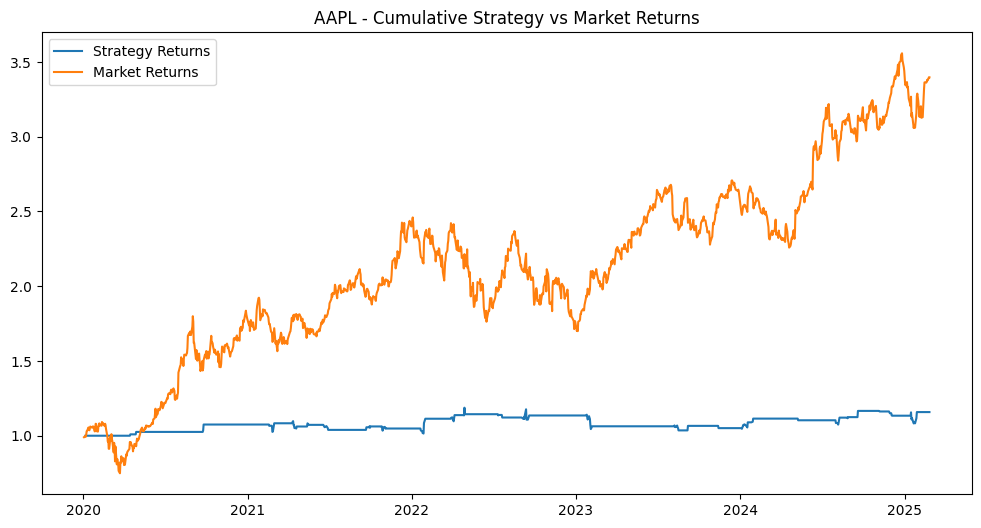

In [8]:
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['Strategy_Returns'] = data['Returns'] * data['Position'].shift()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod()

plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.title(f'{ticker} - Cumulative Strategy vs Market Returns')
plt.legend()
plt.show()